In [7]:
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
import mplcyberpunk
plt.style.use("cyberpunk")

In [8]:
data = pd.read_csv('https://raw.githubusercontent.com/openZH/covid_19/master/COVID19_Fallzahlen_CH_total_v2.csv', parse_dates=['date'])
data.drop((data['abbreviation_canton_and_fl'] == 'FL').index)
data = data.drop(columns=['time', 'source']).set_index(['date'])

In [9]:
ncumul_conf = data.pivot(columns='abbreviation_canton_and_fl', values='ncumul_conf').ffill().fillna(0)
current_hosp = data.pivot(columns='abbreviation_canton_and_fl', values='current_hosp').ffill().fillna(0)

In [10]:
df = pd.concat([
    current_hosp.sum(axis=1).iloc[:-1].rolling(7).sum().rename('Aktuell hospitalisiert'),
    ncumul_conf.sum(axis=1).iloc[:-1].diff().rolling(7).sum().rename('Neu bestätigt'),
    ncumul_conf.sum(axis=1).iloc[:-1].rolling(7).sum().rename('Total bestätigt'),
], axis=1)

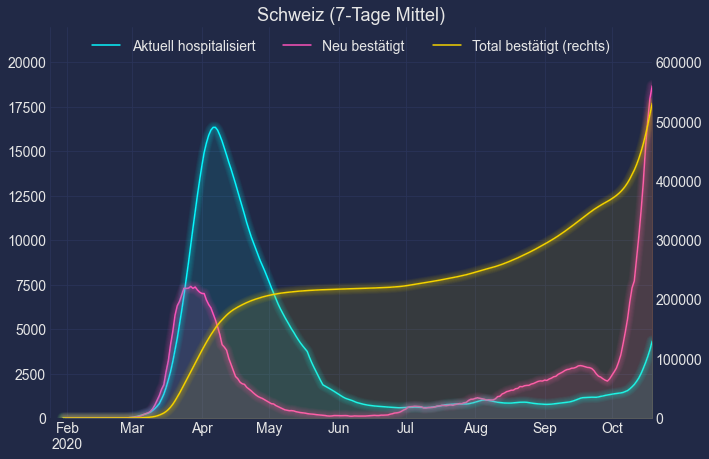

In [25]:
plt.close('all')
ax = df.plot.line(xlabel='', secondary_y=['Total bestätigt'])

ax.set_title('Schweiz (7-Tage Mittel)', fontsize=18)
ax.figure.set_size_inches((1.8*6, 1.8*4))

left_lines = ax.get_lines()
right_lines = ax.right_ax.get_lines()

for l in right_lines:
    l.set_label(l.get_label() + ' (rechts)')
lines = left_lines + right_lines
ax.legend(lines, [l.get_label() for l in lines], loc='upper center', ncol=3, prop={'size': 14})

for a in [ax, ax.right_ax]:
    a.tick_params(axis='both', labelsize=14)

ax.set_ylim((0, 22e3))
ax.right_ax.set_ylim((0, 30*22e3))

ax.right_ax.grid(False)

mplcyberpunk.add_glow_effects(ax)
mplcyberpunk.add_glow_effects(ax.right_ax)

ax.grid(axis='both')